# eda007

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

## データセットの読み込み

In [2]:
input_path = Path("../input")

train_df = pd.read_parquet(input_path / "train.parquet")
test_df = pd.read_parquet(input_path / "test.parquet")

## EDA

datetime(日時)：日付 + 時間(1時間ごとに1data)\
season(季節)：1 = 春, 2 = 夏, 3 = 秋, 4 = 冬\
holiday(祝日)：0 = 祝日ではない, 1 = 祝日\
workingday(労働日)：0 = 休日または休暇, 1 = 労働日\
weather(天気)：\
1: 快晴, 雲が少ない, 部分的に曇り, 部分的に曇り\
2：霧＋曇り、霧＋雲切れ、霧＋雲少、霧\
3: 小雪、小雨+雷雨+雲が散らばる、小雨+雲が散らばる\
4：大雨＋氷霰＋雷雨＋霧、雪＋霧\
temp(気温)：摂氏温度\
atemp(体感気温)：摂氏の感じる温度\
humidity(湿度)：相対湿度\
windspeed(風速)：風速\
casual(非登録ユーザーの利用数)：非登録ユーザーの利用数\
registered(登録ユーザーの利用数)：登録ユーザーの利用数\
count(総利用数)：総利用数


In [3]:
datetime = pd.to_datetime(train_df["datetime"])

train_df["year"] = datetime.dt.year
train_df["month"] = datetime.dt.month
train_df["day"] = datetime.dt.day
train_df["hour"] = datetime.dt.hour
train_df["dayofweek"] = datetime.dt.day_name()

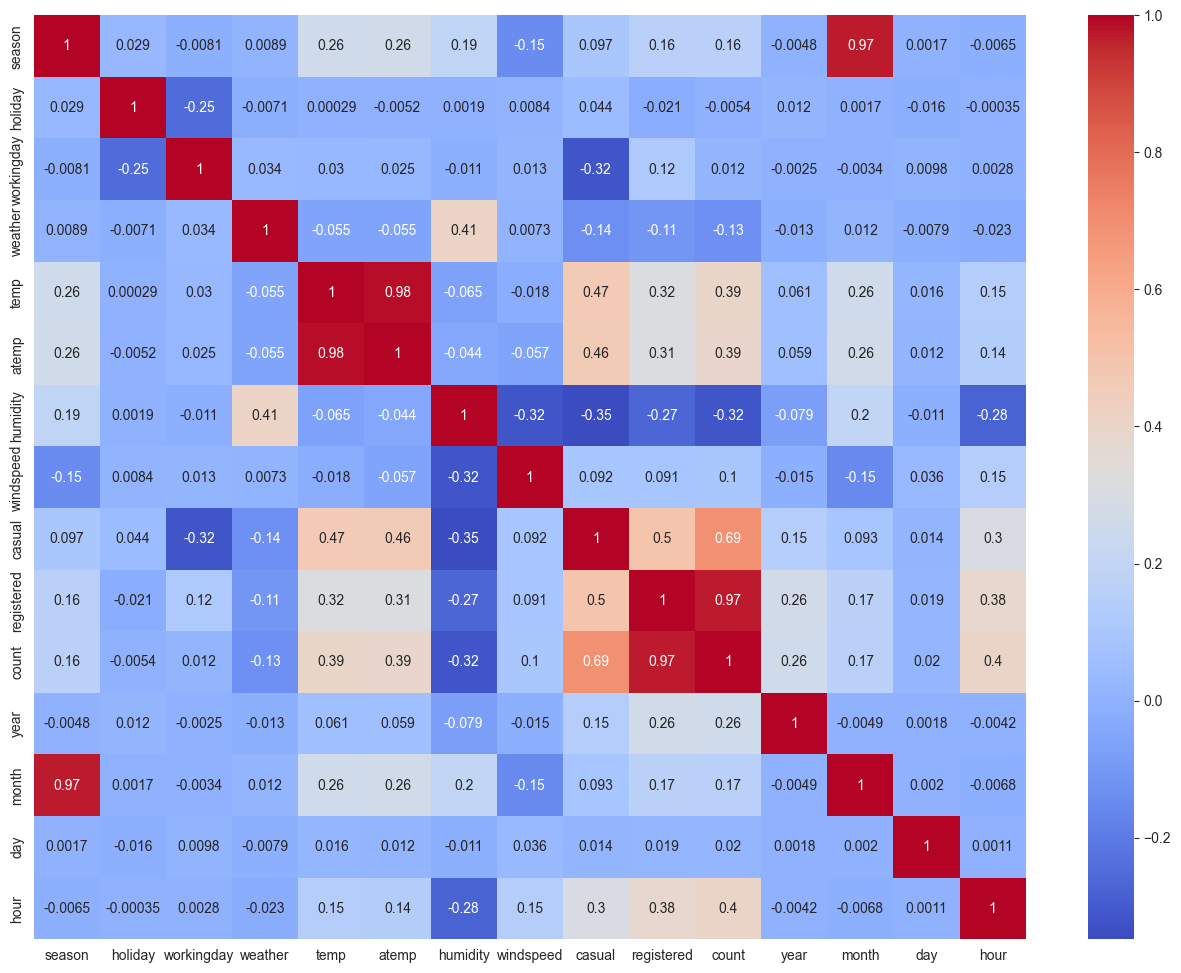

In [4]:
figure = plt.figure(figsize=(16, 12))
numeric_train_df = train_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_train_df.corr(), annot=True, cmap="coolwarm")
plt.show()

<Figure size 600x600 with 0 Axes>

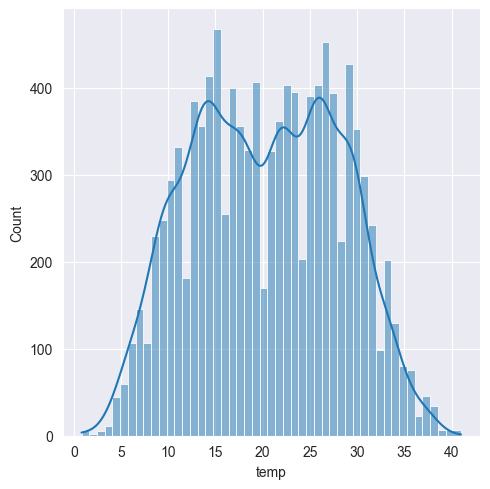

In [5]:
fig = plt.figure(figsize=(6, 6))
unique_temp = train_df["temp"].unique()
unique_temp.sort()
sns.displot(train_df["temp"], bins=unique_temp, kde=True)
plt.show()

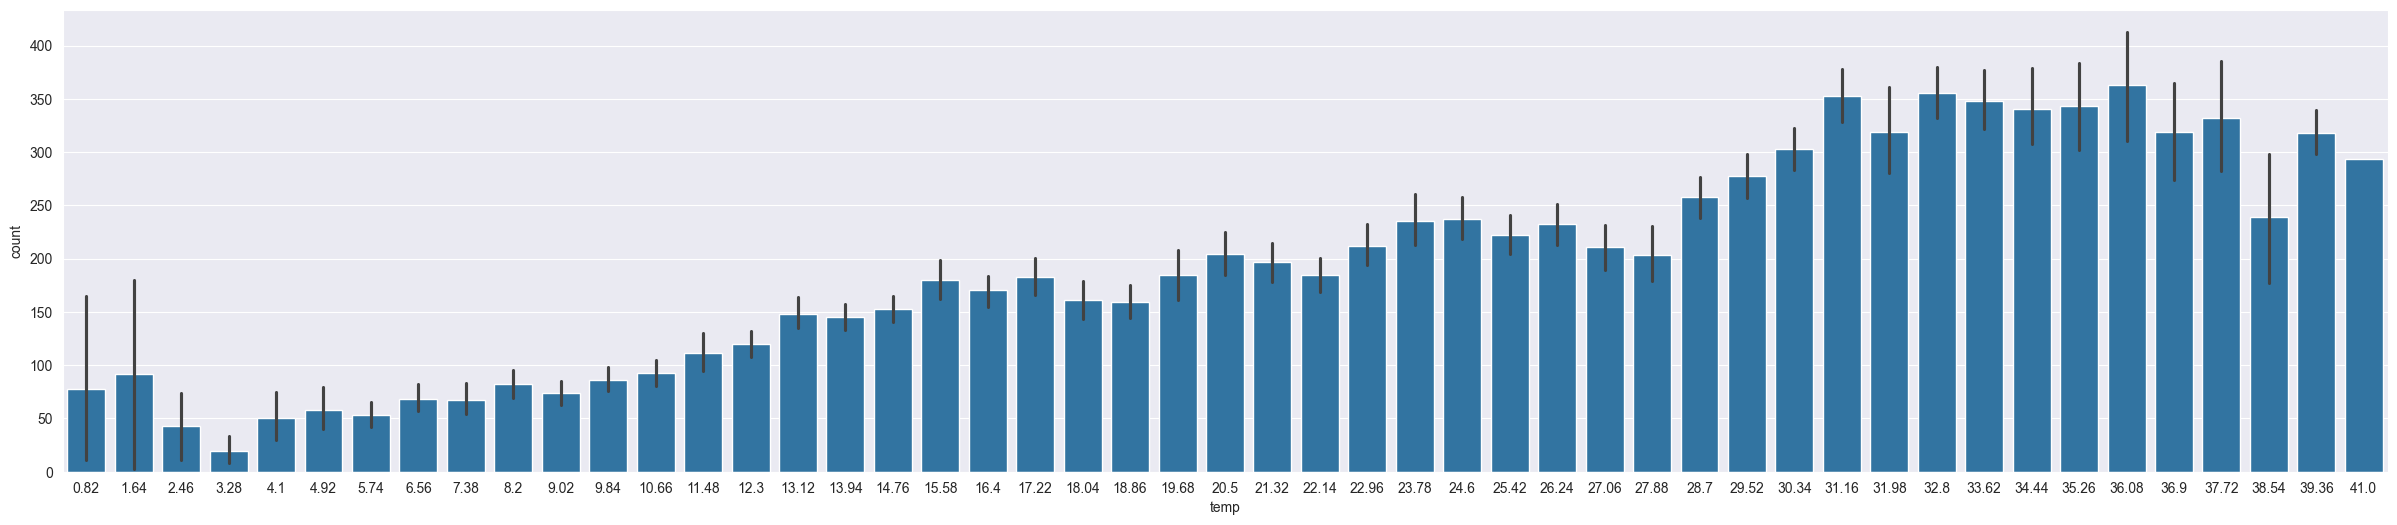

In [7]:
fig = plt.figure(figsize=(30, 6))
sns.barplot(x="temp", y="count", data=train_df)
plt.show()

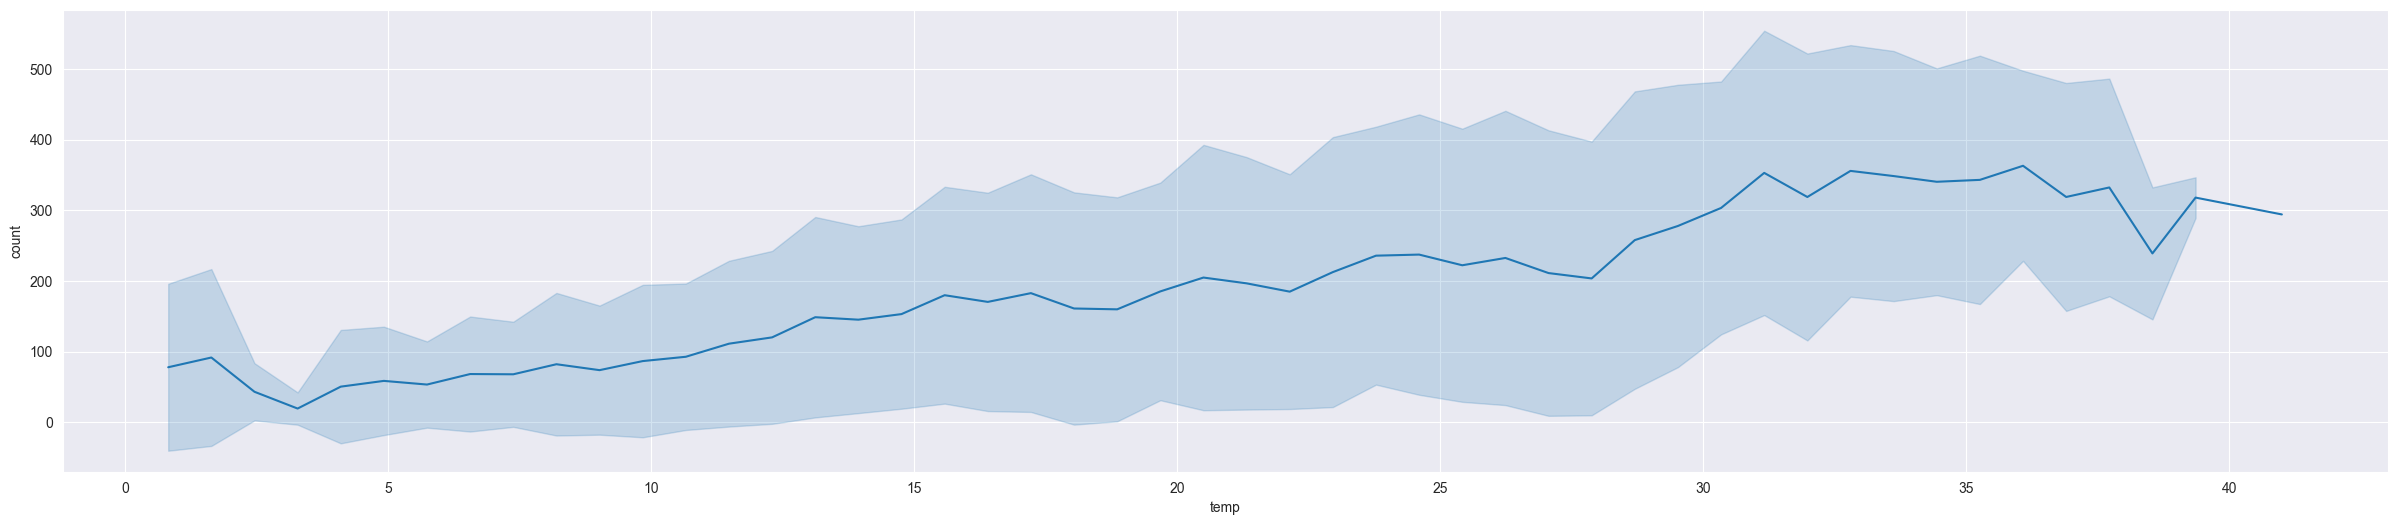

In [8]:
fig = plt.figure(figsize=(30, 6))
sns.lineplot(x="temp", y="count", data=train_df, errorbar="sd")
plt.show()

気温が高ければ利用数が多い傾向にありそう。

<Figure size 600x600 with 0 Axes>

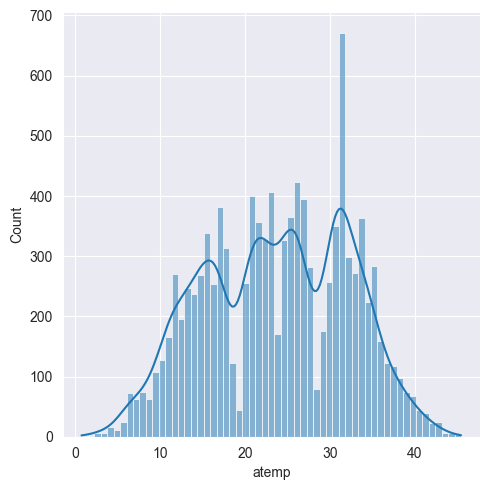

In [9]:
fig = plt.figure(figsize=(6, 6))
unique_atemp = train_df["atemp"].unique()
unique_atemp.sort()
sns.displot(train_df["atemp"], bins=unique_atemp, kde=True)
plt.show()

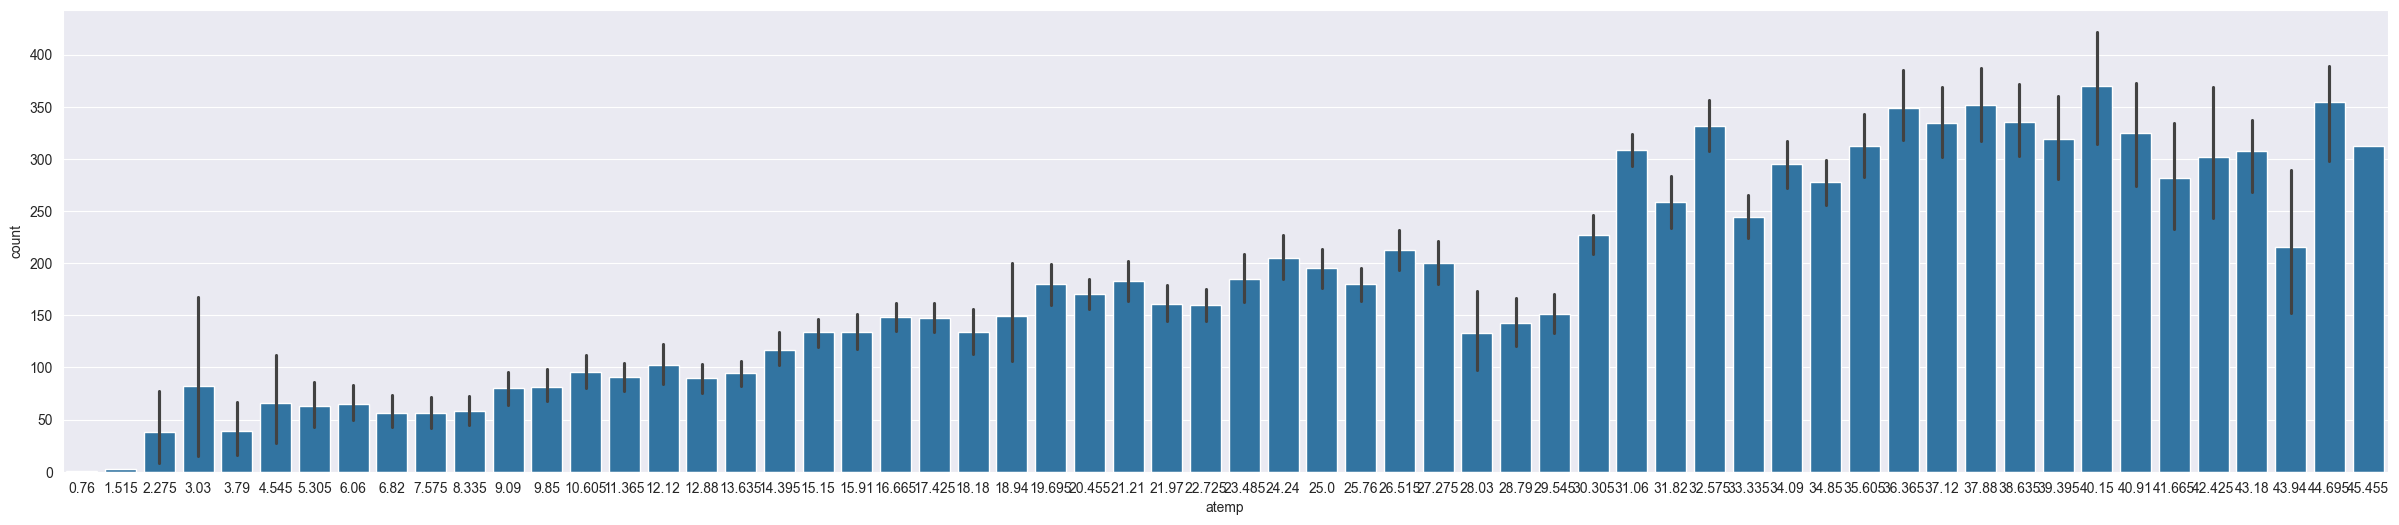

In [10]:
fig = plt.figure(figsize=(30, 6))
sns.barplot(x="atemp", y="count", data=train_df)
plt.show()

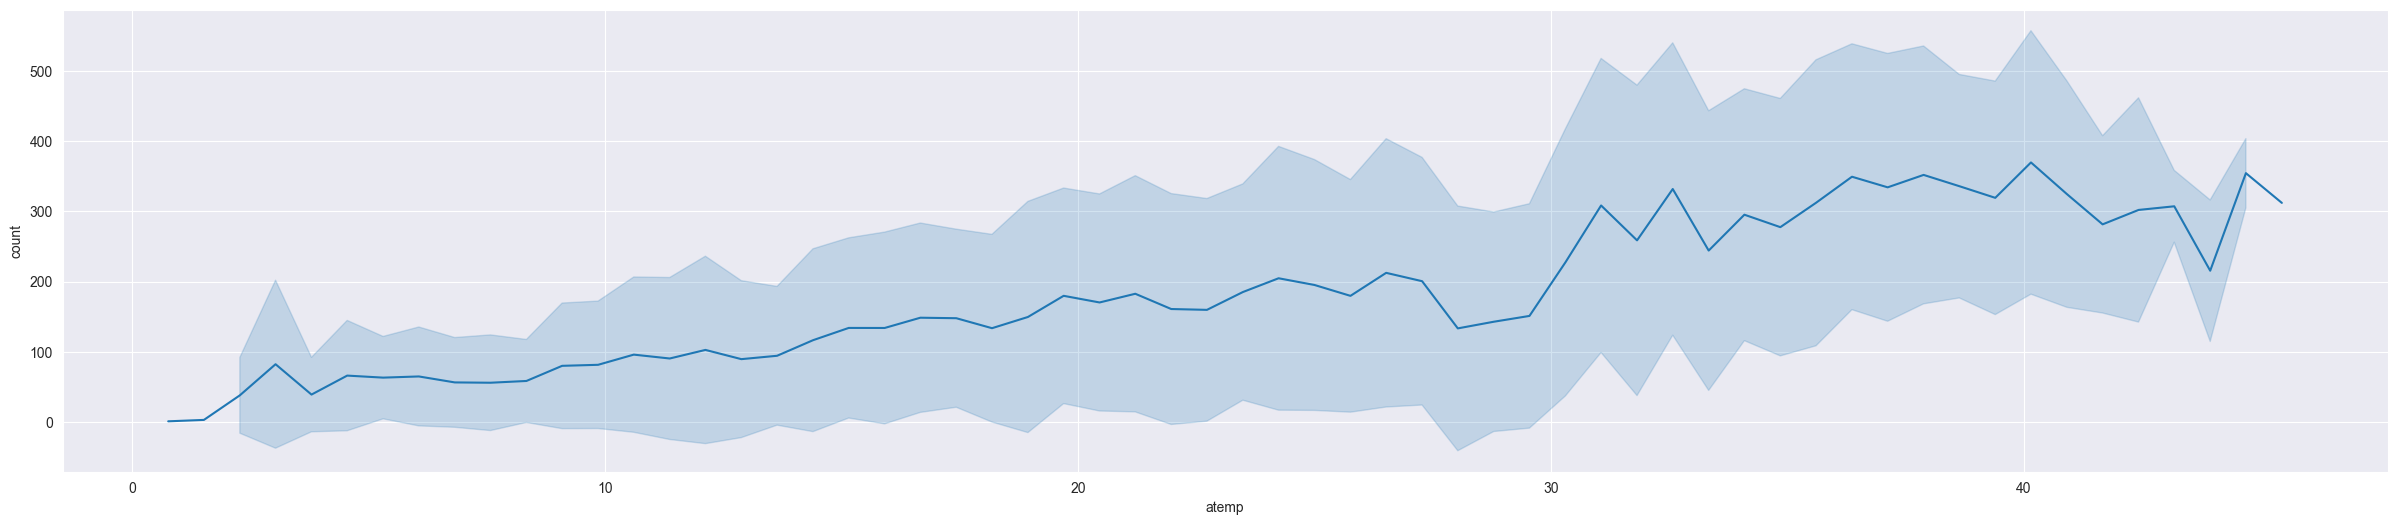

In [11]:
fig = plt.figure(figsize=(30, 6))
sns.lineplot(x="atemp", y="count", data=train_df, errorbar="sd")
plt.show()

こちらも同様に、体感気温が高ければ利用数が多い傾向にありそう。

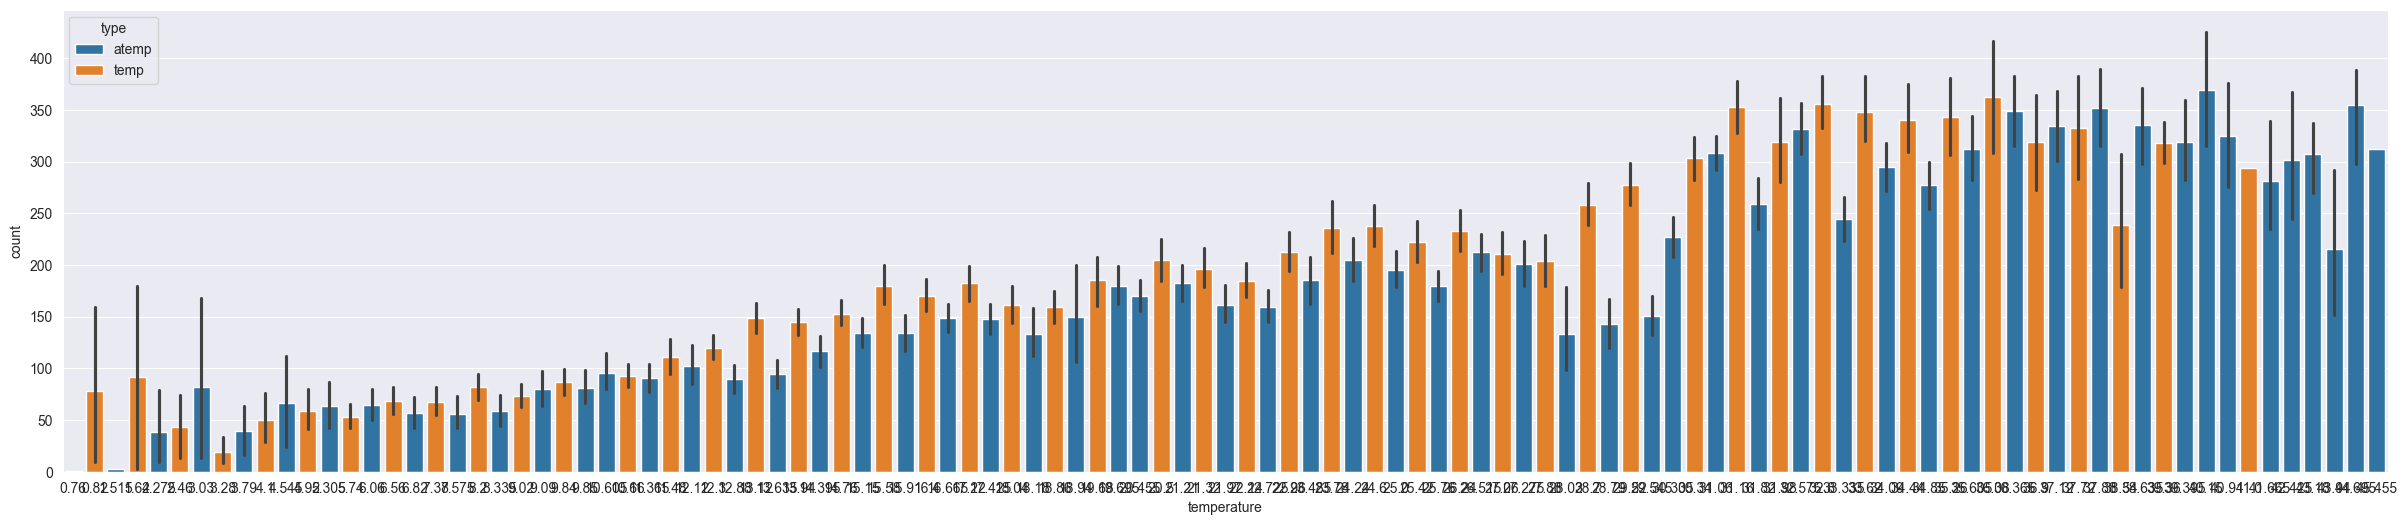

In [13]:
melted_df = train_df.melt(id_vars="count", value_vars=["temp", "atemp"], var_name="type", value_name="temperature")

plt.figure(figsize=(30, 6))
sns.barplot(x="temperature", y="count", hue="type", data=melted_df)
plt.show()

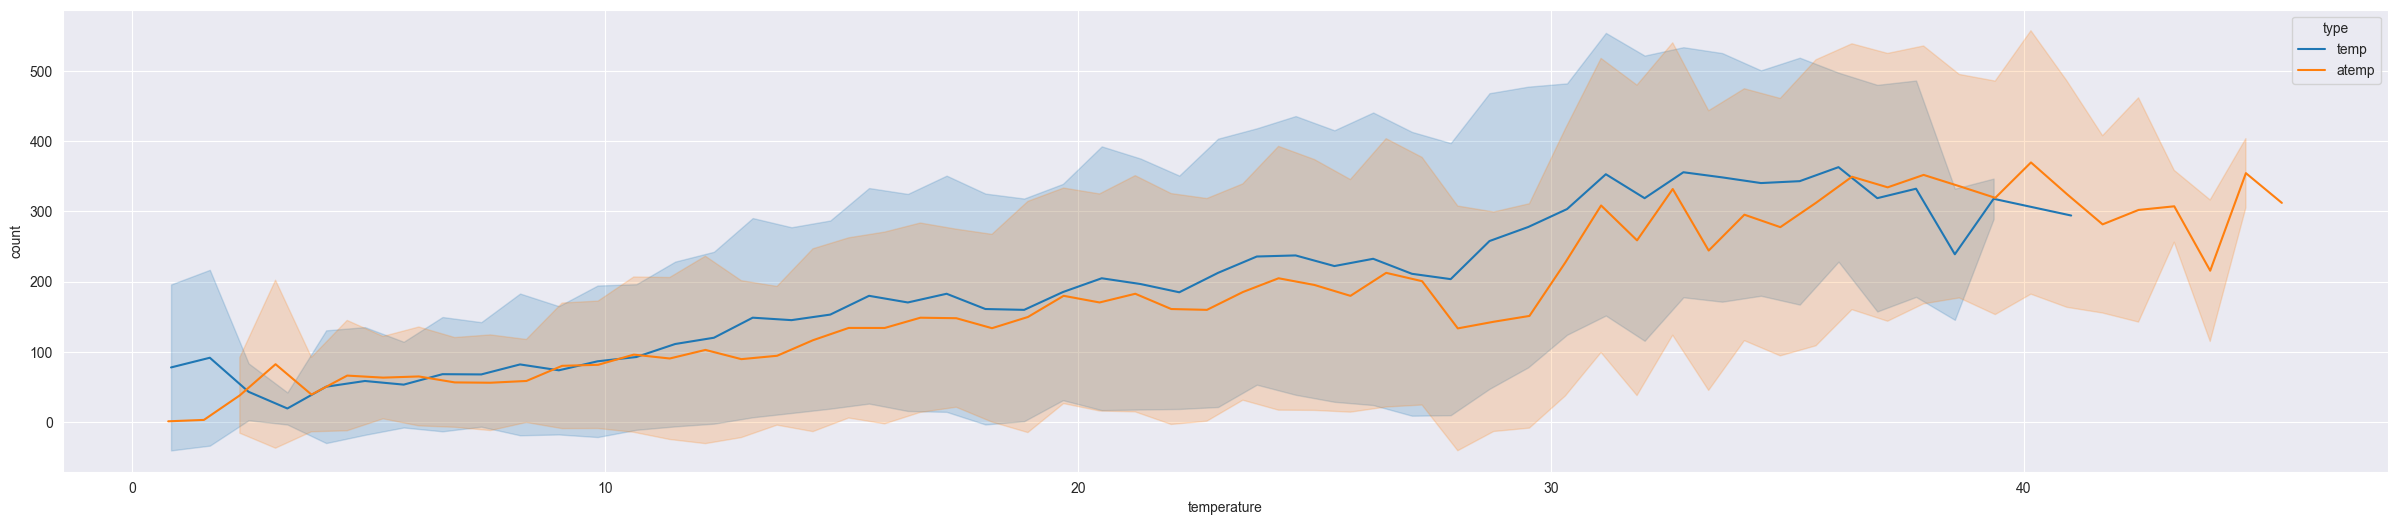

In [15]:
plt.figure(figsize=(30, 6))
sns.lineplot(x="temperature", y="count", hue="type", data=melted_df, errorbar="sd")
plt.show()

傾向としてはやはりtemp, atempどちらも変わらないように思える。\
気温はfloatなので、一旦散布図を用いて見てみる。

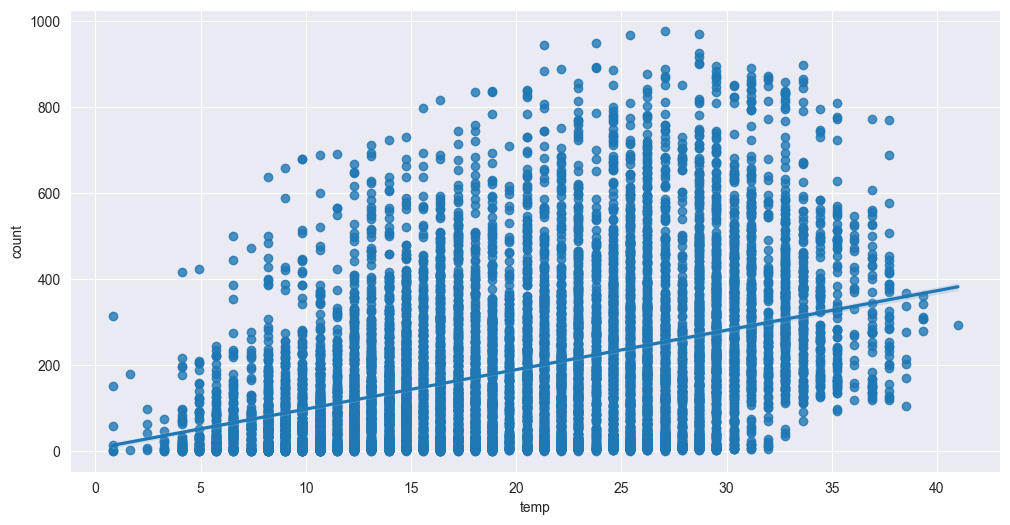

In [37]:
fig = plt.figure(figsize=(12, 6))
sns.regplot(x="temp", y="count", data=train_df)
plt.show()

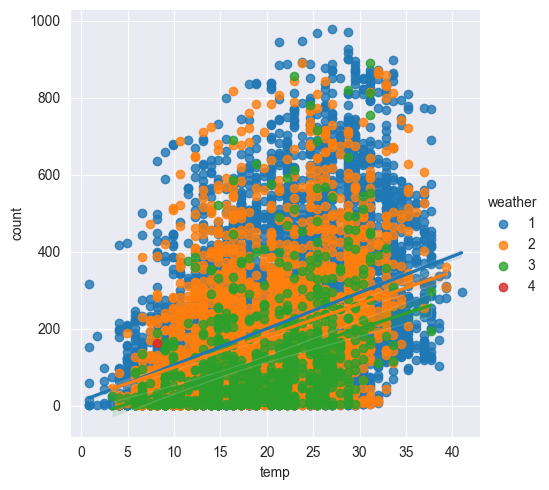

In [44]:
sns.lmplot(x="temp", y="count", data=train_df, hue="weather")
plt.show()

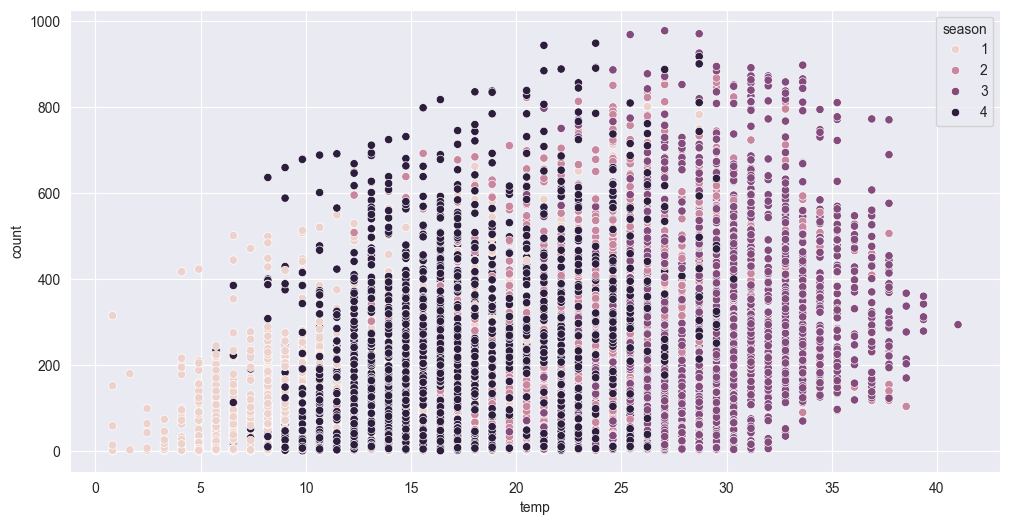

In [27]:
fig = plt.figure(figsize=(12, 6))
sns.scatterplot(x="temp", y="count", data=train_df, hue="season")
plt.show()

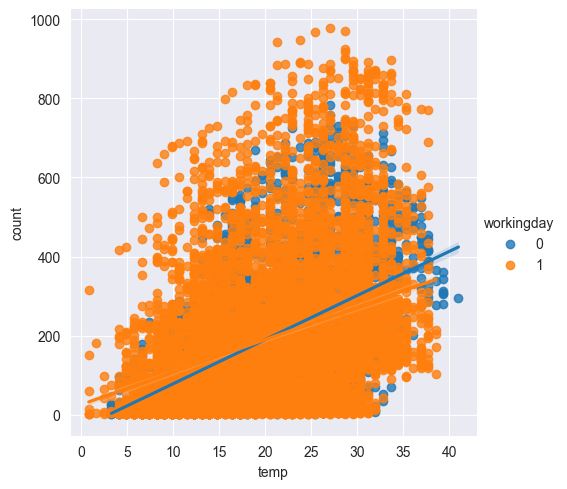

In [45]:
sns.lmplot(x="temp", y="count", data=train_df, hue="workingday")
plt.show()

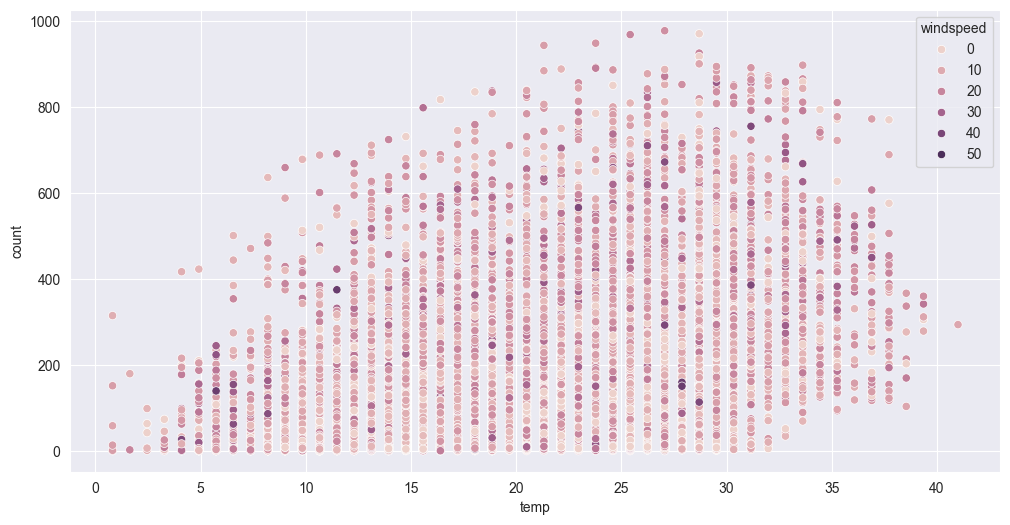

In [51]:
fig = plt.figure(figsize=(12, 6))
sns.scatterplot(x="temp", y="count", data=train_df, hue="windspeed")
plt.show()

tempとcountは正の相関がある通り、気温が高いと利用数が多くなる傾向にある。\
weatherとtempの相関は-0.055でほとんど相関ないけど、weather=1がすべて包含している形に見える。\
seasonとtempの相関は0.26で、季節によって気温が変わることがわかる。\
workingday, windspeedとtempに関しては、グラフからほとんど意味をなしていないことが分かる。

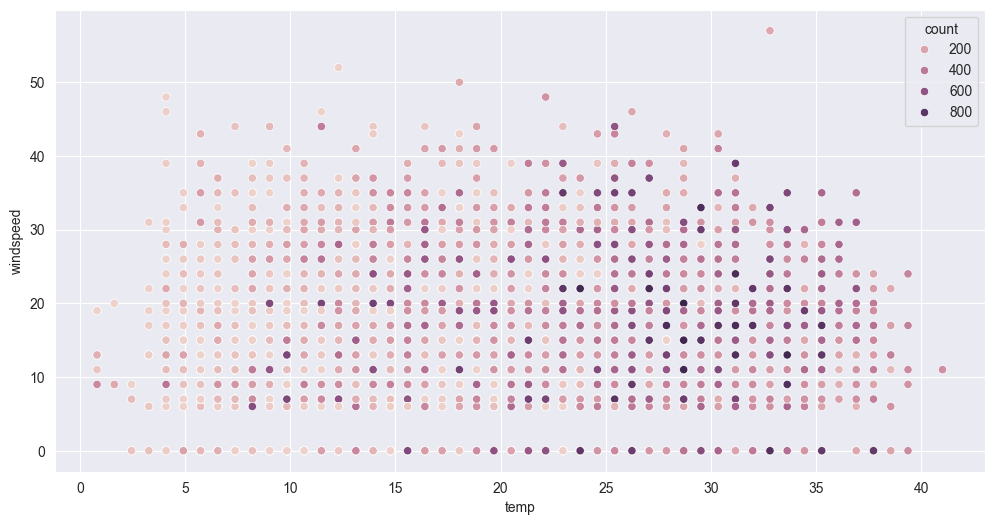

In [55]:
fig = plt.figure(figsize=(12, 6))
sns.scatterplot(x="temp", y="windspeed", data=train_df, hue="count")
plt.show()

windspeedとcountの相関は0.1で、ほとんど相関ない。\
tempとcountの相関は0.39で、気温が高いと利用数が多くなる傾向にある。\
windspeed縦軸を見ても特に傾向が見えん。